# Import Libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

# Loading DataSet

In [2]:
df = pd.read_excel('Countries_dataset2.xlsx')
df.head()

,name,Longitude,Latitude
0,Mauritania,-10.347798,20.257367
1,Montserrat,-62.185185,16.739414
2,Mauritius,57.571206,-20.277687
3,Malawi,34.289356,-13.218081
4,Malaysia,109.697623,3.789868


In [3]:
df.shape

(92, 3)

# Visualization of DataSet

Text(0, 0.5, 'Latitude')

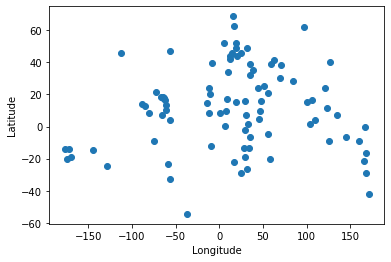

In [4]:
plt.scatter(df.Longitude,df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Longitude','Latitude']])
y_predicted

array([0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2,
       1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2,
       0, 0, 0, 0])

In [6]:
df['cluster'] = y_predicted
df.head()

,name,Longitude,Latitude,cluster
0,Mauritania,-10.347798,20.257367,0
1,Montserrat,-62.185185,16.739414,2
2,Mauritius,57.571206,-20.277687,0
3,Malawi,34.289356,-13.218081,0
4,Malaysia,109.697623,3.789868,1


In [7]:
km.cluster_centers_

array([[ 26.09571002,  19.57792167],
       [132.07115843,   4.27720238],
       [-90.11839772,   1.92472354]])

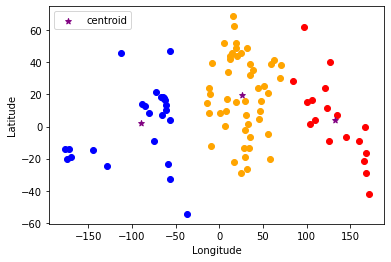

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Longitude,df1['Latitude'],color='orange')
plt.scatter(df2.Longitude,df2['Latitude'],color='red')
plt.scatter(df3.Longitude,df3['Latitude'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Elbow Plot

In [9]:
k_rng = range(1,10)
k_rng

range(1, 10)

In [10]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Longitude','Latitude']])
    sse.append(km.inertia_)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


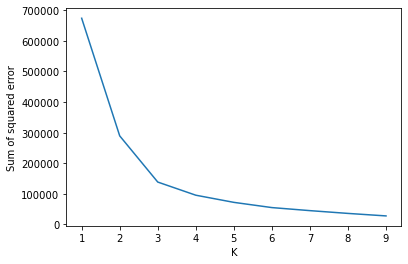

In [11]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)